## Sentiment Analysis

### 사전지식

- The dataset has 1.6 million tweets, with no missing values in any column.

- Each tweet has a target sentiment (0 for negative,2 neutral, 4 for positive), an ID, a timestamp, a flag (query or 'NO_QUERY'), the username, and the text.

- The sentiment targets are balanced, with an equal number of positive and negative labels.

#### tweets 데이터 파악

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import seaborn as sns
import random
import re

# !pip install wordcloud
# nltk.download('punkt')
# nltk.download('stopwords')

In [27]:
headers = ['target','id','date','flag','user','text']
df = pd.read_csv('/Users/admin/HMG/W2/Sentiment Analysis/twe.csv', names = headers, encoding='cp1252')
df

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


target
Negative    800000
Positive    800000
Name: count, dtype: int64


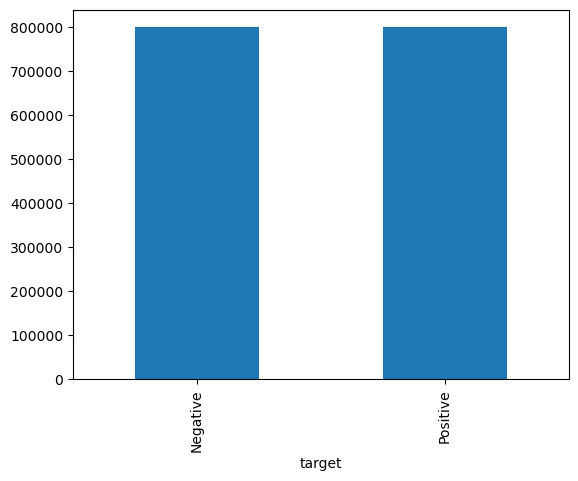

In [28]:
sentiment = {0:"Negative", 4:"Positive"}
print(df.target.apply(lambda x: sentiment[x]).value_counts())
df.target.apply(lambda x: sentiment[x]).value_counts().plot(kind = 'bar')
plt.show()

#### 데이터 전처리

In [29]:
def preprocess_text(text):
    # Remove URL
    text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", ' ', text) 
    text = re.sub(r"[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{2,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", ' ', text) 
    
    # Tokenize and remove stop words
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_words = [word for word in word_tokens if word.isalnum() and word.lower() not in stop_words]
    
    # Remove small words
    filtered_words = [word for word in filtered_words if len(word) > 3]
    
    return ' '.join(filtered_words)

positive_text = ' '.join(df[df['target'] == 4]['text'].apply(preprocess_text))
negative_text = ' '.join(df[df['target'] == 0]['text'].apply(preprocess_text))


#### 샘플링

In [54]:
def get_top_n_words(text, n=500):
    words = text.split()
    word_freq = Counter(words)
    most_common_words = word_freq.most_common(n)
    return dict(most_common_words)

positive_top_words = get_top_n_words(positive_text)
negative_top_words = get_top_n_words(negative_text)

positive_df = pd.DataFrame(positive_top_words.items(), columns=['Word', 'Frequency'])
negative_df = pd.DataFrame(negative_top_words.items(), columns=['Word', 'Frequency'])
display(positive_df)
display(negative_df)

,Word,Frequency
0,good,46503
1,quot,45862
2,love,38758
3,like,35887
4,time,26782
...,...,...
495,sick,1281
496,hanging,1278
497,point,1278
498,dress,1270


,Word,Frequency
0,work,42396
1,like,39737
2,today,34861
3,going,29732
4,back,29249
...,...,...
495,three,1412
496,saturday,1410
497,using,1409
498,second,1401


#### 워드클라우드 생성

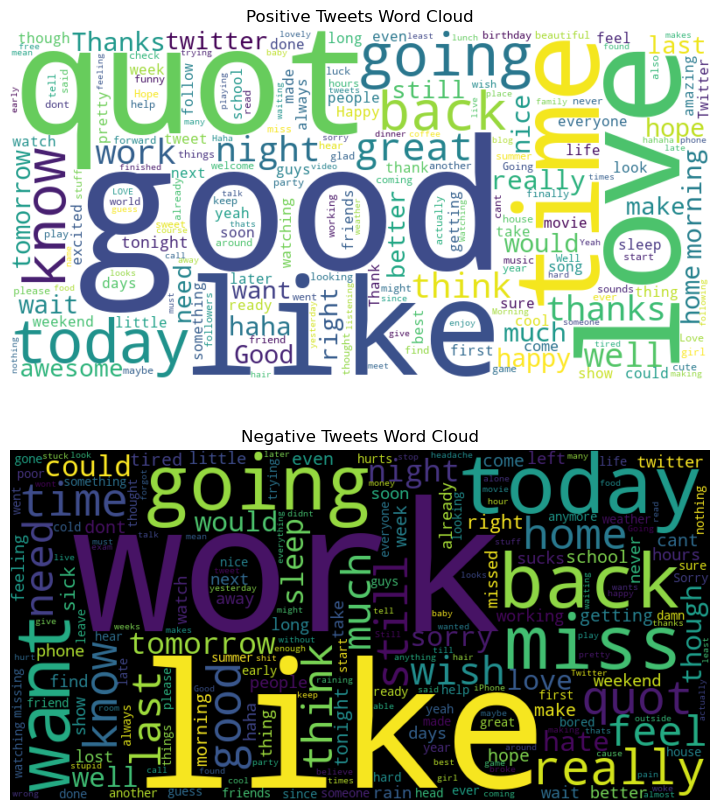

In [55]:
positive_wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate_from_frequencies(positive_top_words)
negative_wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='black').generate_from_frequencies(negative_top_words)

plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Tweets Word Cloud')
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Tweets Word Cloud')
plt.axis('off')

plt.show()